Description

In [1]:
# Figure X
# Cre  delivery via modRNA

# Import Functions and set directories

## Functions

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
#datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/fig_modRNA/fig_modRNA_'

## Import data

In [2]:
# 20240405flow_exp20240402_BioAp1_GIBmod
# 20240405flow_exp20240402_BioBp1_GIBmod
# 20240405flow_exp20240402_BioCp1_mod

In [3]:
# Import Data - bioreplicate 1
folder = '20240405flow_exp20240402_BioAp1_GIBmod'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = 'A' 

In [4]:
# Import Data - bioreplicate 2
folder = '20240405flow_exp20240402_BioBp1_GIBmod'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = 'B' 

In [5]:
# Import Data - bioreplicate 3
folder = '20240405flow_exp20240402_BioCp1_mod'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = 'C' 

## Concat and gates

In [6]:
data = pd.concat( [data1, data2, data3], ignore_index=True)

In [7]:
data.columns.unique()

Index(['reporter', 'ZF', 'Cre', 'well', 'population', 'FSC-A', 'FSC-H',
       'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'mGL-A', 'mGL-H', 'mGL-W',
       'iRFP670-A', 'iRFP670-H', 'iRFP670-W', 'TagBFP-A', 'TagBFP-H',
       'TagBFP-W', 'Janelia Fluor 549-A', 'Janelia Fluor 549-H',
       'Janelia Fluor 549-W', 'mCherry-A', 'mCherry-H', 'mCherry-W', 'Time',
       'bioreplicate'],
      dtype='object')

In [8]:
data['bioreplicate'].unique()

array(['A', 'B', 'C'], dtype=object)

In [9]:
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
# data = data[ data['Janelia Fluor 549-A'] >0]
data = data[ data['iRFP670-A'] >0]
data['log10 mGL-A'] = np.log10(data['mGL-A'])

In [10]:
iRFP670_gate = 10000 
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]

New Criteria (reporter, ZF, Cre)

In [11]:
#Combine ZF and Cre Conditions 
data_iRFP670gated['reporter.ZF.Cre'] = data_iRFP670gated['reporter'] + '.' +data_iRFP670gated['ZF'] + '.' + data_iRFP670gated['Cre']
data['reporter.ZF.Cre'] = data['reporter'] + '.' +data['ZF'] + '.' + data['Cre']

<ipython-input-11-9d85d4605800>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['reporter.ZF.Cre'] = data_iRFP670gated['reporter'] + '.' +data_iRFP670gated['ZF'] + '.' + data_iRFP670gated['Cre']


New Criteria (ZF and Cre), cond_list

In [12]:
#Combine ZF and Cre Conditions 
data_iRFP670gated['cond'] = data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']
data['cond'] = data['ZF'] + '. ' + data['Cre']

<ipython-input-12-2d076e67cfc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['cond'] = data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']


In [13]:
# Make a list of all the cond. This will be used for the order later on 
cond_list = pd.unique( data_iRFP670gated['cond'])
display(cond_list)

array(['none. none', 'ZF37. noCre', 'ZF43. noCre',
       'ZF37. modRNA_Cre_350ng', 'ZF43. modRNA_Cre_350ng',
       'ZF37. modRNA_Cre_500ng', 'noZF. noCre', 'ZF43. modRNA_Cre_500ng'],
      dtype=object)

In [14]:
# drop irrelevant conditions and wells
data_iRFP670gated = data_iRFP670gated.drop(data_iRFP670gated[data_iRFP670gated['cond'] == 'none. none'].index)

cond_list = pd.unique( data_iRFP670gated['cond'])
display(cond_list)

cond_list_nounstained = pd.array([ 'noZF. noCre',
                                  'ZF43. noCre',
                                  'ZF43. modRNA_Cre_350ng',
                                  'ZF43. modRNA_Cre_500ng',
                                   'ZF37. noCre',
                                   'ZF37. modRNA_Cre_350ng',
                                  'ZF37. modRNA_Cre_500ng'] )

cond_list_ZF43 = pd.array([ 'ZF43. noCre', 'ZF43. modRNA_Cre_350ng', 'ZF43. modRNA_Cre_500ng'] )
cond_list_ZF37 = pd.array([ 'ZF37. noCre', 'ZF37. modRNA_Cre_350ng', 'ZF37. modRNA_Cre_500ng'] )

array(['ZF37. noCre', 'ZF43. noCre', 'ZF37. modRNA_Cre_350ng',
       'ZF43. modRNA_Cre_350ng', 'ZF37. modRNA_Cre_500ng', 'noZF. noCre',
       'ZF43. modRNA_Cre_500ng'], dtype=object)

New Criteria Bioreplicate + reporter

In [15]:
#Combine bioreplicate, ZF and Cre Conditions 
data_iRFP670gated['bioreplicate_cond_rept'] = data_iRFP670gated['bioreplicate'] + '. ' + data_iRFP670gated['reporter'] + '. ' + data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']
data['bioreplicate_cond_rept'] = data['bioreplicate'] + '. ' + data['reporter'] + '. ' + data['ZF'] + '. ' + data['Cre']

In [16]:
conditions = pd.unique(data_iRFP670gated.bioreplicate_cond_rept)
display(conditions)

array(['A. pTET021_203bp. ZF37. noCre', 'A. pTET021_203bp. ZF43. noCre',
       'A. pTET021_203bp. ZF37. modRNA_Cre_350ng',
       'A. pTET021_203bp. ZF43. modRNA_Cre_350ng',
       'A. pTET021_203bp. ZF37. modRNA_Cre_500ng',
       'A. pTET021_203bp. noZF. noCre',
       'A. pTET021_203bp. ZF43. modRNA_Cre_500ng',
       'B. pTET021_203bp. ZF37. noCre', 'B. pTET021_203bp. ZF43. noCre',
       'B. pTET021_203bp. ZF37. modRNA_Cre_350ng',
       'B. pTET021_203bp. ZF43. modRNA_Cre_350ng',
       'B. pTET021_203bp. ZF37. modRNA_Cre_500ng',
       'B. pTET021_203bp. noZF. noCre',
       'B. pTET021_203bp. ZF43. modRNA_Cre_500ng',
       'C. pTET021_203bp. ZF37. noCre', 'C. pTET021_203bp. ZF43. noCre',
       'C. pTET021_203bp. ZF37. modRNA_Cre_350ng',
       'C. pTET021_203bp. ZF43. modRNA_Cre_350ng',
       'C. pTET021_203bp. ZF37. modRNA_Cre_500ng',
       'C. pTET021_203bp. noZF. noCre',
       'C. pTET021_203bp. ZF43. modRNA_Cre_500ng'], dtype=object)

# Joint Plots

9688


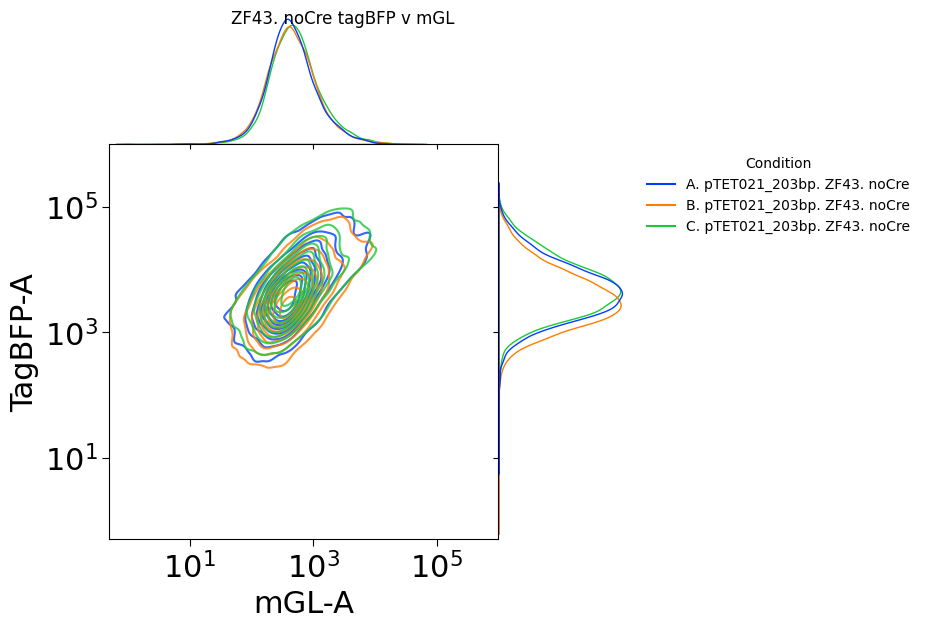

6097


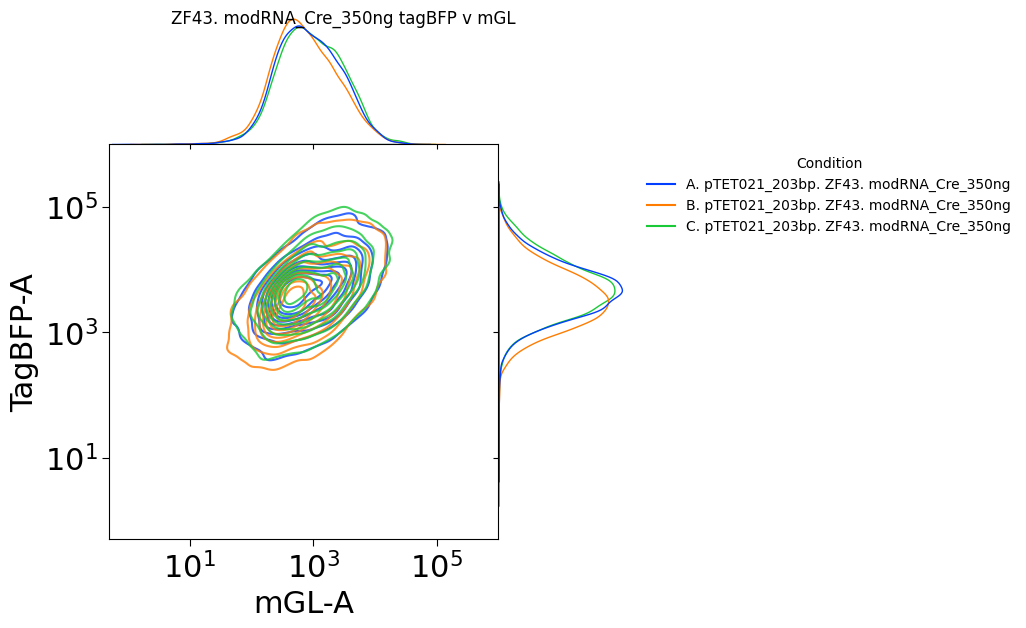

6121


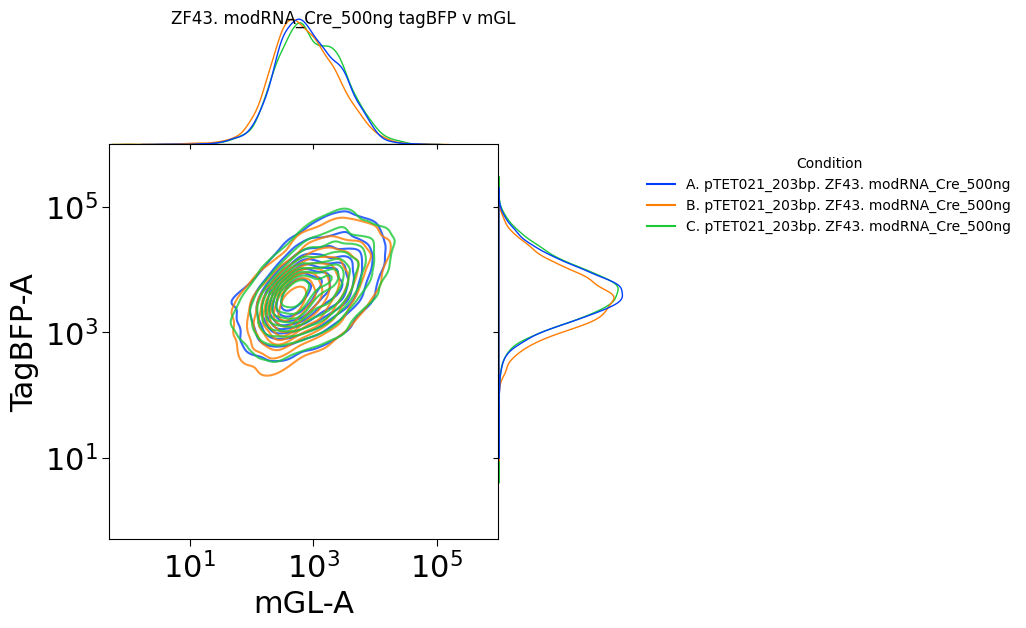

In [ ]:
# tagBFP vs. mGL
plot_name = ' tagBFP v mGL'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept' #########biorep, cre
palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF43
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



6645


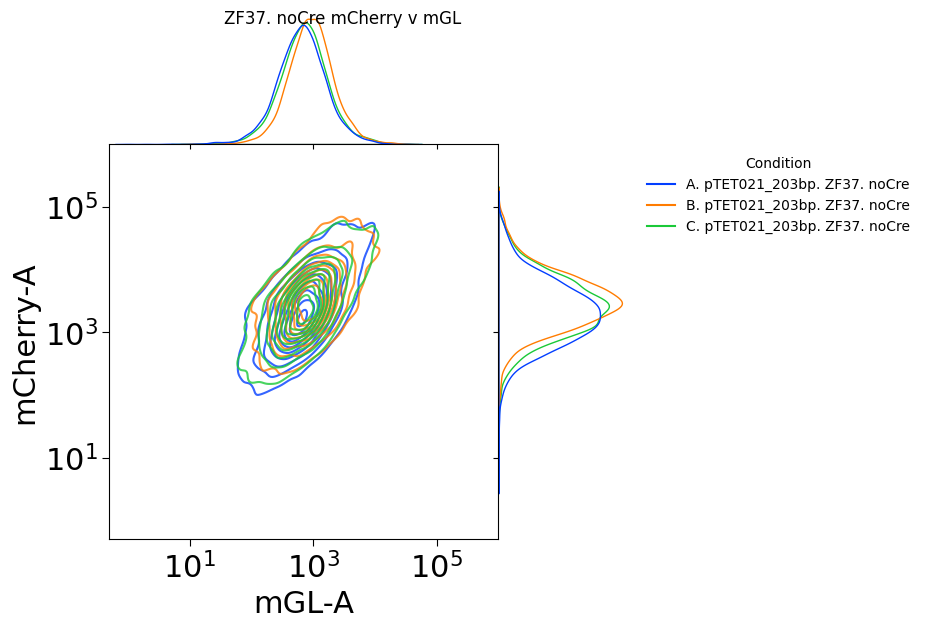

6966


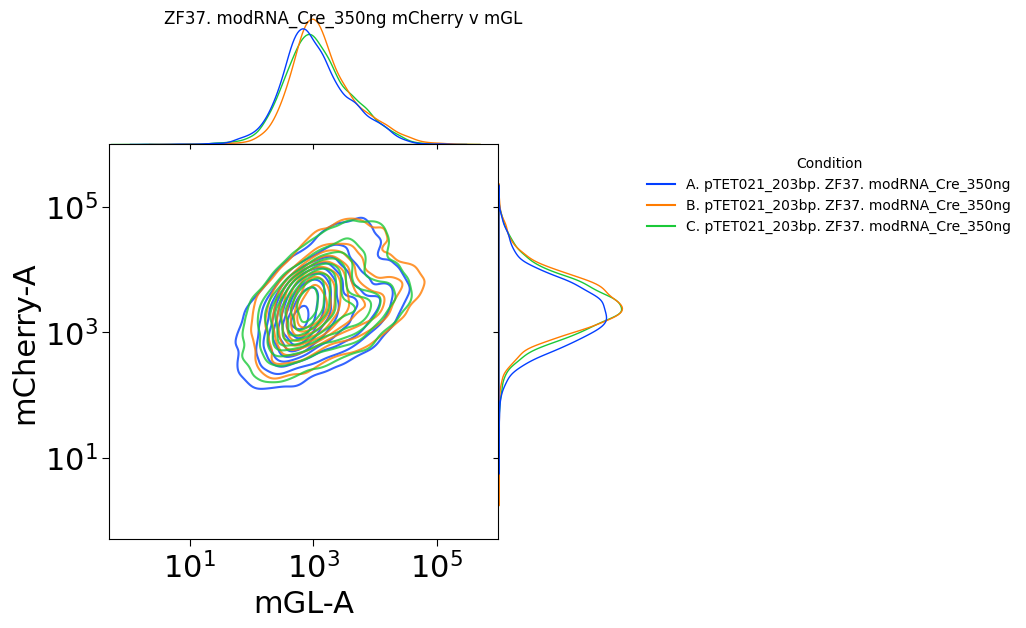

7986


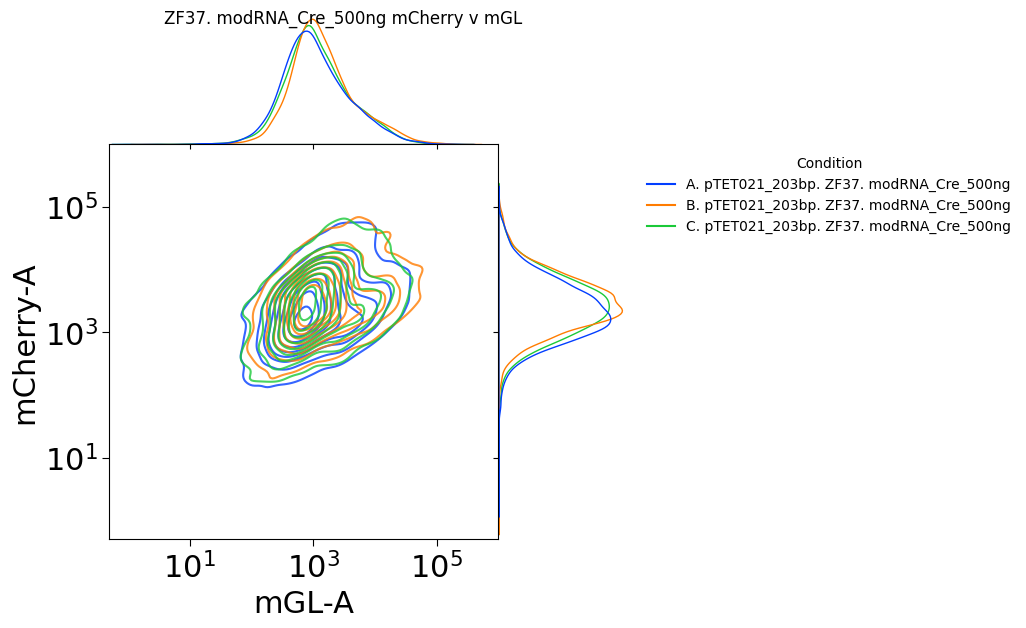

In [ ]:
# mRuby2 vs. mGL
plot_name = ' mCherry v mGL'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept'; palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF37
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



# Summary plots

In [ ]:
display(cond_list)

array(['ZF37. modRNA_Cre_350ng', 'noZF. noCre', 'ZF37. noCre',
       'ZF37. modRNA_Cre_500ng', 'ZF43. modRNA_Cre_350ng',
       'ZF43. modRNA_Cre_500ng', 'ZF43. noCre'], dtype=object)

## Summary Stats

In [38]:
df = data_iRFP670gated

# only 3 reps on same day
#df = data_iRFP670gated[data_iRFP670gated['bioreplicate'] != '20240309flow_exp20240306_p3'] #choose dataframe

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'ZF', 'Cre','cond','bioreplicate_cond_rept','bioreplicate'] #how to filter results, columns 


x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_bioreplicate = calc_stats(df,by,x,stat) #calculate statistics 
#display(s_bioreplicate) #display results, use for troublshooting

## Mean plots

c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5019607843137255, 0.5019607843137255, 0.5019607843137255)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.7490196078431373, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in fav

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ZF43_ZF43. noCre v.s. ZF43_ZF43. modRNA_Cre_350ng: t-test independent samples, P_val=4.184e-03 stat=-5.878e+00
ZF37_ZF37. noCre v.s. ZF37_ZF37. modRNA_Cre_350ng: t-test independent samples, P_val=2.207e-02 stat=-3.634e+00
noZF_noZF. noCre v.s. ZF43_ZF43. modRNA_Cre_350ng: t-test independent samples, P_val=1.805e-04 stat=-1.338e+01
noZF_noZF. noCre v.s. ZF37_ZF37. modRNA_Cre_350ng: t-test independent samples, P_val=3.391e-04 stat=-1.139e+01


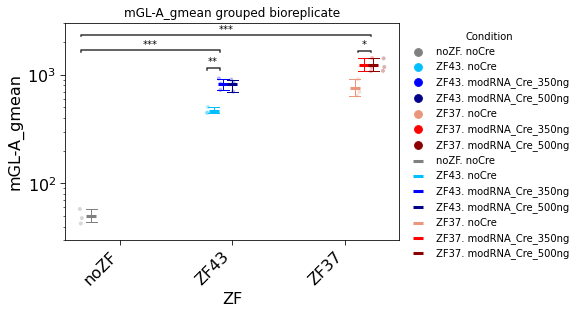

c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5019607843137255, 0.5019607843137255, 0.5019607843137255)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.7490196078431373, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in fav

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ZF43_ZF43. noCre v.s. ZF43_ZF43. modRNA_Cre_350ng: t-test independent samples, P_val=9.508e-01 stat=6.570e-02
ZF37_ZF37. noCre v.s. ZF37_ZF37. modRNA_Cre_350ng: t-test independent samples, P_val=7.872e-01 stat=-2.887e-01
noZF_noZF. noCre v.s. ZF43_ZF43. modRNA_Cre_350ng: t-test independent samples, P_val=8.624e-04 stat=-8.949e+00
noZF_noZF. noCre v.s. ZF37_ZF37. modRNA_Cre_350ng: t-test independent samples, P_val=1.426e-01 stat=1.822e+00


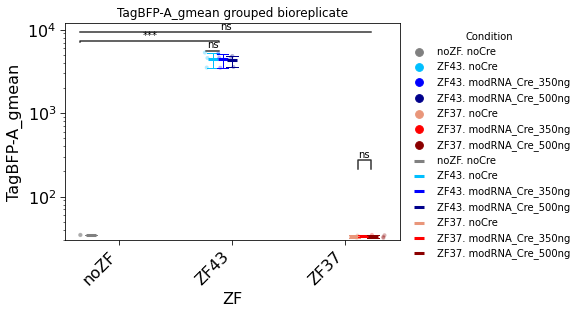

c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5019607843137255, 0.5019607843137255, 0.5019607843137255)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.7490196078431373, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in fav

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ZF43_ZF43. noCre v.s. ZF43_ZF43. modRNA_Cre_350ng: t-test independent samples, P_val=3.632e-02 stat=-3.097e+00
ZF37_ZF37. noCre v.s. ZF37_ZF37. modRNA_Cre_350ng: t-test independent samples, P_val=9.951e-01 stat=-6.515e-03
noZF_noZF. noCre v.s. ZF43_ZF43. modRNA_Cre_350ng: t-test independent samples, P_val=6.273e-01 stat=5.250e-01
noZF_noZF. noCre v.s. ZF37_ZF37. modRNA_Cre_350ng: t-test independent samples, P_val=3.259e-04 stat=-1.150e+01


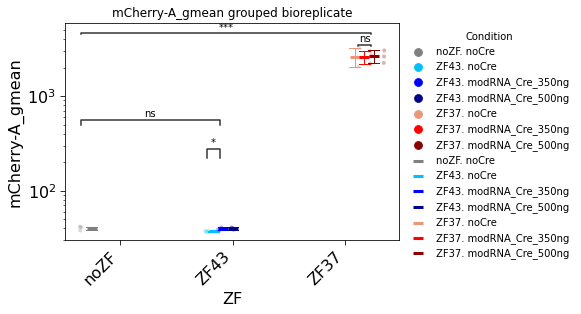

FileNotFoundError: [Errno 2] No such file or directory: './figs_2024_promoter_editing_paper/fig_modRNA/fig_modRNA_mCherry-A_gmean grouped bioreplicate.svg'

<Figure size 432x288 with 0 Axes>

In [39]:
#Plot summary plot for the desired statistics
palette = {
        'noZF. noCre': 'grey',
        'ZF43. noCre': 'deepskyblue',
        'ZF43. modRNA_Cre_350ng': 'blue',
        'ZF43. modRNA_Cre_500ng': 'darkblue',
        'ZF37. noCre': 'darksalmon',
        'ZF37. modRNA_Cre_350ng': 'red',
        'ZF37. modRNA_Cre_500ng': 'darkred'
}

hue_order = pd.array(['noZF. noCre',
                    'ZF43. noCre',
                    'ZF43. modRNA_Cre_350ng',
                    'ZF43. modRNA_Cre_500ng',
                    'ZF37. noCre',
                    'ZF37. modRNA_Cre_350ng',
                    'ZF37. modRNA_Cre_500ng'
])
#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order_ZF = pd.array( ['noZF','ZF43', 'ZF37'])
order = order_ZF; 
palette = palette; hue_order = hue_order; x = 'ZF'; hue='cond'; yscale= 'log'
ylim = [3e1, 3e3]

#Only plot some reporters
#data_now = s_bioreplicate[s_bioreplicate['reporter'].isin(order_repts)]
data_now = s_bioreplicate[s_bioreplicate['cond'].isin(hue_order)]
#display(data_now)

#Set p-value significance comparisons 
pairs = [
       [('noZF',  'noZF. noCre'), ('ZF43', 'ZF43. modRNA_Cre_350ng')],
       [('noZF',  'noZF. noCre'), ('ZF37', 'ZF37. modRNA_Cre_350ng')],
       [('ZF43',  'ZF43. noCre'), ('ZF43', 'ZF43. modRNA_Cre_350ng')],
       [('ZF37',  'ZF37. noCre'), ('ZF37', 'ZF37. modRNA_Cre_350ng')],
]

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' grouped bioreplicate'
    plt.yscale(yscale)
    g = summary_plot( x=x, y=y, hue=hue, pairs=pairs, data=data_now, ylim=ylim, yscale =yscale,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, 
                    fontsize = 16)
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Histograms and Percent higher ##

In [17]:
palette = {
        'noZF. noCre': 'grey',
        'ZF43. noCre': 'deepskyblue',
        'ZF43. modRNA_Cre_350ng': 'blue',
        'ZF43. modRNA_Cre_500ng': 'darkblue',
        'ZF37. noCre': 'darksalmon',
        'ZF37. modRNA_Cre_350ng': 'red',
        'ZF37. modRNA_Cre_500ng': 'darkred'
}

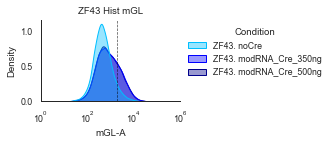

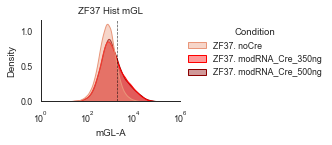

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ZF43. noCre v.s. ZF43. modRNA_Cre_350ng: t-test independent samples, P_val=1.439e-03 stat=-7.826e+00
ZF37. noCre v.s. ZF37. modRNA_Cre_350ng: t-test independent samples, P_val=1.315e-03 stat=-8.014e+00


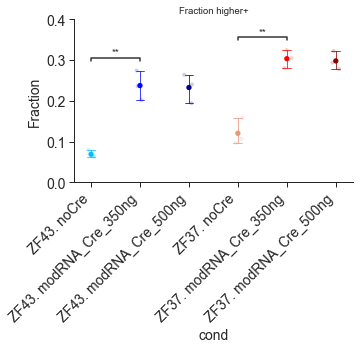

<Figure size 432x288 with 0 Axes>

In [18]:
#Set common conditions
parameters = pd.array(['mGL-A']) ; palette=palette; xlim = [1e0,1e6]; hue='cond'
xsize = 2.5
ysize = 1.5

ZF43gate = 2e3
ZF37gate = 2e3

# ZF43
cond_now = cond_list_ZF43
hue_order = pd.array([
                    'ZF43. noCre',
                    'ZF43. modRNA_Cre_350ng',
                    'ZF43. modRNA_Cre_500ng'
])
data_now = data_iRFP670gated[ data_iRFP670gated['cond'].isin(cond_now)]
plottitle = 'ZF43' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hue_order, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.4, line=ZF43gate,
                         legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

# ZF37
cond_now = cond_list_ZF37
hue_order = pd.array([
                    'ZF37. noCre',
                    'ZF37. modRNA_Cre_350ng',
                    'ZF37. modRNA_Cre_500ng'
])
data_now = data_iRFP670gated[ data_iRFP670gated['cond'].isin(cond_now)]
plottitle = 'ZF37' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hue_order, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.4,
                         legendtitle='Condition', xlim=xlim, line=ZF37gate)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## Also make the fraction above the gate
def label_higher(df):
    if df['ZF'] == 'ZF43':
        if df['mGL-A'] > ZF43gate:
            return '+'
        else:
            return '-'
    elif df['ZF'] == 'ZF37':
        if df['mGL-A'] > ZF37gate:
            return '+'
        else:
            return '-'
    else:
        return 'NA'
data_iRFP670gated['higher']  = data_iRFP670gated.apply( label_higher, axis=1)
df = data_iRFP670gated
by = ['reporter', 'ZF', 'Cre','cond','bioreplicate_cond_rept','bioreplicate','higher'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_higher_biorep = calc_stats(df,by,x,stat) #calculate statistics 
#display(s_higher_biorep)
s_higher_biorep.to_excel('FigS12A_modRNA_trans.xlsx',index=False)

#Plot summary plot for the desired statistics
palette = {
        'noZF. noCre': 'grey',
        'ZF43. noCre': 'deepskyblue',
        'ZF43. modRNA_Cre_350ng': 'blue',
        'ZF43. modRNA_Cre_500ng': 'darkblue',
        'ZF37. noCre': 'darksalmon',
        'ZF37. modRNA_Cre_350ng': 'red',
        'ZF37. modRNA_Cre_500ng': 'darkred'
}

order = pd.array(['ZF43. noCre',
                    'ZF43. modRNA_Cre_350ng',
                    'ZF43. modRNA_Cre_500ng',
                    'ZF37. noCre',
                    'ZF37. modRNA_Cre_350ng',
                    'ZF37. modRNA_Cre_500ng'
])
#List of stats to plot 
stats_plot = pd.array( ['Fraction'])
#set plotting parameters 

palette = palette; hue_order = None; x = 'cond'; hue=None; yscale= 'linear'
ylim = [0, 0.4]

#Only plot some reporters
#data_now = s_bioreplicate[s_bioreplicate['reporter'].isin(order_repts)]
data_now = s_higher_biorep[s_higher_biorep['cond'].isin(order)]
data_now = data_now[data_now['higher']=='+']
#display(data_now)

#Set p-value significance comparisons 
pairs = [
       #[('noZF',  'noZF. noCre'), ('ZF43', 'ZF43. modRNA_Cre_350ng')],
       #[('noZF',  'noZF. noCre'), ('ZF37', 'ZF37. modRNA_Cre_350ng')],
       [( 'ZF43. noCre'), ('ZF43. modRNA_Cre_350ng')],
       [( 'ZF37. noCre'), ('ZF37. modRNA_Cre_350ng')],
]

xsize = 5
ysize = 3

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' higher+'
    g = plt.figure(figsize=(xsize,ysize))
    g = summary_plot( x=x, y=y, hue=hue, pairs=pairs, data=data_now, ylim=ylim, yscale =yscale,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, 
                    scientific=False,
                    fontsize = 14)
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')
